In [1]:
from google.colab import drive
drive.mount('/content/drive')
import nltk
nltk.download ('punkt')
from nltk.tokenize import word_tokenize
!pip uninstall spacy -y 
!pip install -U spacy>=3.0
!python -m spacy download ru_core_news_md
import spacy
nlp = spacy.load('ru_core_news_md')


MessageError: ignored

In [ ]:
path ='/content/drive/My Drive/rus_elev.txt' 
text = open(path, encoding='utf-8').read()
document = nlp(text)
outname = path.replace('.txt', '-lemmatized.txt') 
with open(outname, 'w', encoding='utf8') as out:
    for token in document:
        out.write(token.lemma_.lower())
        out.write(' ')

In [ ]:
path ='/content/drive/My Drive/rus_elev-lemmatized.txt' 
text = open(path, encoding='utf-8').read()
tokens = nltk.word_tokenize(text)
print (tokens)

['язык', 'быть', 'одновременно', 'и', 'продукт', 'куль¬туры', ',', 'и', 'её', 'важный', 'составной', 'часть', ',', 'и', 'условие', 'существование', 'культура', '..', 'к.', 'леви', '-', 'стросс', '1', '.', 'вдумчиво', 'прочитайте', 'текст', 'и', 'составить', 'его', 'план', '.', '2', '.', 'определить', 'стиль', 'и', 'тип', 'речь', 'данного', 'текст', ',', 'аргументировать', 'свой', 'ответ', '.', '3', '*', '.', 'опираться', 'на', 'содержаться', 'в', 'текст', 'информация', ',', 'объяснить', 'смысл', 'следующий', 'словосочетание', ',', 'в', 'которых', 'употребляться', 'существительное', 'культура', '.', 'нравственный', 'культура', ',', 'материальный', 'культура', ',', 'культура', 'земледе¬лия', ',', 'духовный', 'культура', ',', 'музыкальный', 'культура', ',', 'культура', 'речь', ',', 'культу¬ра', 'мышление', ',', 'культура', 'речевой', 'поведение', ',', 'культура', 'хоровой', 'пение', ',', 'культура', 'труд', ',', 'национальный', 'культура', ',', 'эстетический', 'культура', ',', 'бытовой', 

In [ ]:
import gensim
from gensim import corpora

[(',', 7365), ('.', 5253), (')', 2391), ('и', 2165), ('в', 1981), ('(', 1750), ('``', 1488), ('-', 848), ('текст', 644), ('—', 609), ('на', 602), ('слово', 579), ('речь', 562), ('с', 561), ('?', 533), (':', 518), ('язык', 465), (';', 451), ('какой', 427), ('как', 424), ('не', 421), ('что', 409), ('/', 408), ('этот', 386), ('из', 372), ('к', 369), ('по', 341), ('1', 339), ('предложение', 314), ('2', 293), ('стиль', 286), ('вы', 256), ('русский', 253), ('о', 245), ('а', 243), ('...', 238), ('3', 236), ('н', 219), ('свой', 217), ('объяснить', 208), ('для', 206), ('средство', 201), ('нн', 189), ('пример', 185), ('или', 182), ('научный', 182), ('*', 181), ('языковой', 181), ('это', 178), ('использовать', 173)]


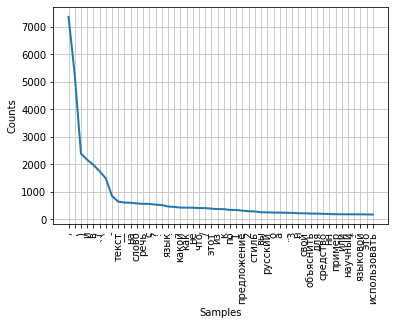

In [ ]:
#до чистки от стоп-слов и символов
import nltk
from nltk.probability import FreqDist
freq = nltk.FreqDist(tokens)
fdist = FreqDist(tokens)
print(fdist.most_common(50)) 
fdist.plot(50,cumulative=False)

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('russian')
#print (stop_words)
stop_words.extend(['этот','весь','для','было','стать','что','был', 'была','это', 'свой','как', 'его', 'только','тот', 'однако', 'под', 'также', 'который', 'тыс','как', 'на', 'по' ])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
filtered_tokens = []
for token in tokens:
  if token not in stop_words:
    filtered_tokens.append(token)
print (filtered_tokens)

['язык', 'одновременно', 'продукт', 'куль¬туры', ',', 'её', 'важный', 'составной', 'часть', ',', 'условие', 'существование', 'культура', '..', 'к.', 'леви', '-', 'стросс', '1', '.', 'вдумчиво', 'прочитайте', 'текст', 'составить', 'план', '.', '2', '.', 'определить', 'стиль', 'тип', 'речь', 'данного', 'текст', ',', 'аргументировать', 'ответ', '.', '3', '*', '.', 'опираться', 'содержаться', 'текст', 'информация', ',', 'объяснить', 'смысл', 'следующий', 'словосочетание', ',', 'которых', 'употребляться', 'существительное', 'культура', '.', 'нравственный', 'культура', ',', 'материальный', 'культура', ',', 'культура', 'земледе¬лия', ',', 'духовный', 'культура', ',', 'музыкальный', 'культура', ',', 'культура', 'речь', ',', 'культу¬ра', 'мышление', ',', 'культура', 'речевой', 'поведение', ',', 'культура', 'хоровой', 'пение', ',', 'культура', 'труд', ',', 'национальный', 'культура', ',', 'эстетический', 'культура', ',', 'бытовой', 'культура', ',', 'художественный', 'культура', ',', 'исполнитель

In [ ]:
lema=[w for w in filtered_tokens if w.isalpha() and len(w)>2]

[('текст', 644), ('слово', 579), ('речь', 562), ('язык', 465), ('предложение', 314), ('стиль', 286), ('русский', 253), ('объяснить', 208), ('средство', 201), ('пример', 185), ('научный', 182), ('языковой', 181), ('использовать', 173), ('каждый', 164), ('высказывание', 160), ('речевой', 146), ('разговорный', 145), ('мочь', 141), ('вид', 140), ('почему', 126), ('устный', 123), ('провести', 121), ('значение', 121), ('культура', 118), ('человек', 114), ('являться', 113), ('словарь', 110), ('информация', 109), ('работа', 109), ('основный', 107), ('которые', 104), ('основа', 103), ('синтаксический', 103), ('деловой', 103), ('разбор', 102), ('жанр', 100), ('выделить', 99), ('материал', 99), ('художественный', 97), ('форма', 97), ('разновидность', 94), ('прочитайте', 90), ('мысль', 90), ('норма', 90), ('общение', 89), ('указать', 88), ('первый', 87), ('лексический', 87), ('записать', 86), ('знак', 85)]


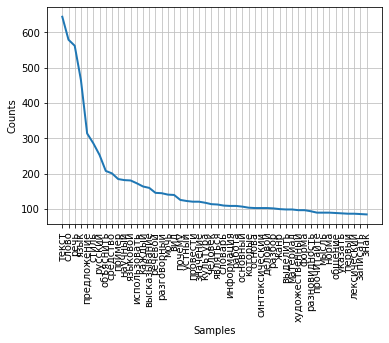

In [ ]:
from nltk import FreqDist
freq = nltk.FreqDist(lema)
fdist = FreqDist(lema)
print(fdist.most_common(50)) 
fdist.plot(50,cumulative=False)

[(('русский', 'язык'), 143), (('разговорный', 'речь'), 103), (('языковой', 'средство'), 84), (('устный', 'высказывание'), 68), (('выделить', 'слово'), 66), (('функциональный', 'разновидность'), 65), (('знак', 'препинание'), 64), (('научный', 'стиль'), 61), (('разновидность', 'язык'), 61), (('стиль', 'речь'), 60), (('пропущенные', 'буква'), 55), (('официальный', 'деловой'), 53), (('раскрывать', 'скобка'), 51), (('буква', 'знак'), 49), (('лингвистический', 'тренажёр'), 47), (('вставлять', 'пропущенные'), 46), (('синтаксический', 'разбор'), 45), (('публицистический', 'стиль'), 45), (('деловой', 'стиль'), 44), (('точка', 'зрение'), 43), (('провести', 'синтаксический'), 42), (('анализ', 'текст'), 40), (('культура', 'речь'), 38), (('русский', 'словесность'), 38), (('абзац', 'текст'), 35), (('препинание', 'раскрывать'), 35), (('художественный', 'литература'), 35), (('привести', 'пример'), 33), (('объяснить', 'почему'), 33), (('сделать', 'вывод'), 33), (('грамматический', 'основа'), 33), (('ис

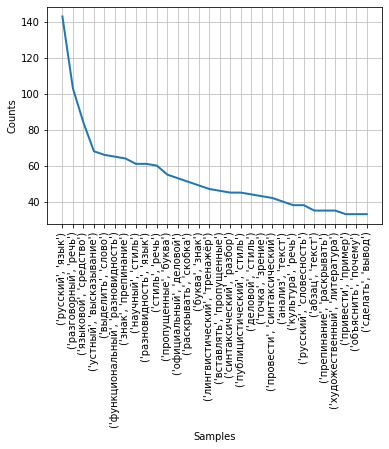

In [ ]:
from nltk import FreqDist
bigram = list(nltk.ngrams(lema, 2))
print (FreqDist(bigram).most_common(50))
fdist = FreqDist(bigram)
fdist.plot(30,cumulative=False)

[(('функциональный', 'разновидность', 'язык'), 51), (('пропущенные', 'буква', 'знак'), 47), (('вставлять', 'пропущенные', 'буква'), 46), (('буква', 'знак', 'препинание'), 41), (('провести', 'синтаксический', 'разбор'), 40), (('официальный', 'деловой', 'стиль'), 38), (('препинание', 'раскрывать', 'скобка'), 35), (('знак', 'препинание', 'раскрывать'), 33), (('словарь', 'русский', 'язык'), 30), (('учебный', 'этимологический', 'словарь'), 24), (('обозначить', 'грамматический', 'основа'), 24), (('этимологический', 'словарь', 'русский'), 22), (('язык', 'художественный', 'литература'), 20), (('объяснить', 'понимать', 'смысл'), 18), (('научный', 'стиль', 'речь'), 18), (('обоснуйте', 'точка', 'зрение'), 18), (('грамматический', 'основа', 'предложение'), 18), (('урок', 'русский', 'язык'), 16), (('справочник', 'русский', 'язык'), 16), (('скобка', 'обозначить', 'грамматический'), 15), (('троп', 'фигура', 'речь'), 15), (('постановка', 'знак', 'препинание'), 15), (('последний', 'предложение', 'текст

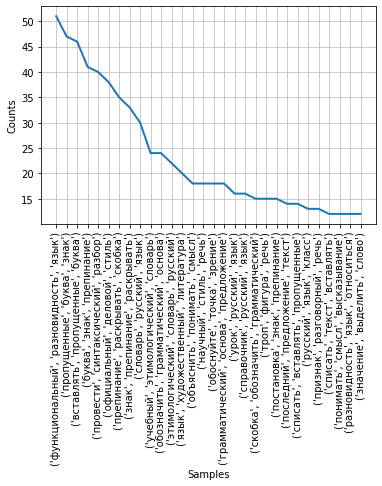

In [ ]:
from nltk import FreqDist
trigram = list(nltk.ngrams(lema, 3))
print (FreqDist(trigram).most_common(50))
fdist2 = FreqDist(trigram)
fdist2.plot(30,cumulative=False)